<a href="https://colab.research.google.com/github/MartinMarzi/IPMdecisions/blob/main/IPMdecisions_DataExploration_colab_1_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# For colab
%pip install umap-learn
%pip install hdbscan
# %pip install babyplots

     |████████████████████████████████| 81kB 3.7MB/s 
     |████████████████████████████████| 1.2MB 9.1MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=f55fd29082be8f5181b48b0bb164d0100cb19ab65ba55e4f79a71edc7cfef5d6
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=84aabc4afdf05b1dfe5ce7d692c5b31f90c7d7ca5caf49540b743067d942efd2
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent
     |████████████████████████████████| 6.4MB 4.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311669 sha256=55da5d9532eb9c9e1f7a647a2624298bd

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from pandas.api.types import CategoricalDtype
import umap
import hdbscan
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#from babyplots import Babyplot


In [4]:
#DATA_FILE = "data/Farmers_edited data 21.12.2020_IPS_FINAL- WEKA_JM.xlsx"
DATA_FILE = "https://kt-cloud.ijs.si/index.php/s/zyLj9jkFQFqJfoQ/download"

In [5]:
# Create dataframe
df = pd.read_excel(DATA_FILE, header=0, engine='openpyxl', na_values=['?'], usecols=range(81), 
                   skiprows= range(150,155))

In [6]:
# Show data size
df.shape

(149, 81)

In [7]:
pd.set_option("max_columns", None)
pd.set_option("max_rows", 10)

In [8]:
df.head()

,Region,Country,Subject,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to7,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,DSS_for_ShortLongTermBothDecision_Cat_NO,Prefered_type_Web_1,Prefered_type_Software_2,Prefered_type_Web_Software_Both_Cat_NO,Importance_of_easy_to_use_1to7,Importance_of_easy_to_use_1to2,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to7,Importance_of_efficient_1to2,Importance_of_efficient_1to3,Importance_low_price_1to7,Importance_low_price_1to2,Importance_low_price_1to3,Importance_polyvalence_1to7,Importance_polyvalence_1to2,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to7,Enjoy_using_new_techs_1to2,Enjoy_using_new_techs_1to3,Appreciate_change_1to7,Appreciate_change_1to2,Appreciate_change_1to3,Trust_in_DSS_1to7,Trust_in_DSS_1to2,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to7,Trust_in_colleague_advice_1to2,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to7,Trust_advice_friend_1to2,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Output_preference_Cat_NO,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat
0,south_EU,Italy,ITALY1,4,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,7.0,3.0,1.0,1.0,1,0,1.0,2.0,1,3,0.0,1.0,0.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
1,south_EU,Italy,ITALY2,4,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,4.0,2.0,2.0,NaN,1,0,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,7.0,2.0,3.0,6.0,2.0,2.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,2.0,NaN,0.0,1.0,0.0,2.0,2.0
2,south_EU,Italy,ITALY3,2,1.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,2.0,100.0,5.0,3.0,1.0,1.0,1,10,1.0,2.0,1,2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7.0,2.0,3.0,7.0,2.0,3.0,5.0,1.0,2.0,7.0,2.0,3.0,4.0,1.0,1.0,4.0,1.0,1.0,5.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,2.0,2.0,3.0,0.0,0.0,1.0,3.0,1.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,2.0,2.0
3,south_EU,Italy,ITALY4,2,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,90.0,5.0,3.0,1.0,1.0,1,10,0.0,NaN,1,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,7.0,2.0,3.0,6.0,2.0,2.0,4.0,1.0,1.0,6.0,2.0,2.0,6.0,2.0,2.0,6.0,2.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,NaN,1.0
4,south_EU,Italy,ITALY5,2,1.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,4.0,2.0,2.0,1.0,1,10,1.0,3.0,1,2,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7.0,2.0,3.0,7.0,2.0,3.0,4.0,1.0,1.0,6.0,2.0,2.0,5.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,3.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 81 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Region                                       149 non-null    object 
 1   Country                                      149 non-null    object 
 2   Subject                                      149 non-null    object 
 3   Age_Cat                                      149 non-null    int64  
 4   Gender_1male                                 148 non-null    float64
 5   Degree_Cat                                   144 non-null    float64
 6   Farm_size_Cat                                148 non-null    float64
 7   ProductionUse_selling                        117 non-null    float64
 8   Farm_type_Conventional                       116 non-null    float64
 9   Farm_type_Intergrated                        116 non-null    float64
 10  Fa

In [10]:
# Remove duplicate features and "Subject" feature.
dup_feat = ["Subject", "Production_level_1to7", "DSS_for_ShortLongTermBothDecision_Cat_NO", "Prefered_type_Web_Software_Both_Cat_NO", 
            "Importance_of_easy_to_use_1to7", "Importance_of_easy_to_use_1to2", "Importance_of_efficient_1to7", "Importance_of_efficient_1to2", 
            "Importance_low_price_1to7", "Importance_low_price_1to2", "Importance_polyvalence_1to7", "Importance_polyvalence_1to2", 
            "Enjoy_using_new_techs_1to7", "Enjoy_using_new_techs_1to2", "Appreciate_change_1to7", "Appreciate_change_1to2",
            "Trust_in_DSS_1to7", "Trust_in_DSS_1to2", "Trust_in_colleague_advice_1to7", "Trust_in_colleague_advice_1to2",
            "Trust_advice_friend_1to7", "Trust_advice_friend_1to2", "Output_preference_Cat_NO"] 
df = df.drop(dup_feat, axis=1)

In [11]:
df.shape

(149, 58)

In [12]:
# One hot encode categorical data.
ohe_df = pd.get_dummies(df, columns=["Region", "Country"])
#ohe_df = df
ohe_df

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,Prefered_type_Web_1,Prefered_type_Software_2,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to3,Importance_low_price_1to3,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to3,Appreciate_change_1to3,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat,Region_central_EU,Region_north_EU,Region_south_EU,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Italy,Country_Lithuania,Country_Netherlands,Country_Slovenia,Country_Sweden,Country_UK
0,4,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,3.0,1.0,1.0,1,0,1.0,2.0,1,3,0.0,1.0,0.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,4,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,NaN,1,0,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0,1.0,1.0,2.0,3.0,NaN,NaN,NaN,2.0,NaN,1.0,2.0,NaN,0.0,1.0,0.0,2.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,2,1.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,2.0,100.0,3.0,1.0,1.0,1,10,1.0,2.0,1,2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,0.0,0.0,1.0,1.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,2.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,2,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,90.0,3.0,1.0,1.0,1,10,0.0,NaN,1,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,NaN,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,2,1.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,1.0,1,10,1.0,3.0,1,2,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,4,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,50.0,NaN,NaN,1.0,1,22,0.0,NaN,1,2,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0,3.0,3.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
145,3,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,100.0,NaN,NaN,1.0,1,23,0.0,NaN,1,3,1.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,2.0,NaN,2.0,2.0,2.0,2.0,1.0,1.0,2.0,4.0,0.0,0.0,1.0,2.0,1.0,3.0,2.0,NaN,0.0,1.0,0.0,2.0,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
146,2,1.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,4.0,50.0,NaN,NaN,0.0,1,16,0.0,NaN,1,3,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
147,3,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,100.0,NaN,NaN,1.0,1,22,0.0,NaN,1,3,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,2.

In [13]:
ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 70 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age_Cat                                      149 non-null    int64  
 1   Gender_1male                                 148 non-null    float64
 2   Degree_Cat                                   144 non-null    float64
 3   Farm_size_Cat                                148 non-null    float64
 4   ProductionUse_selling                        117 non-null    float64
 5   Farm_type_Conventional                       116 non-null    float64
 6   Farm_type_Intergrated                        116 non-null    float64
 7   Farm_type_Organic                            116 non-null    float64
 8   Farm_type_Biodynamic                         116 non-null    float64
 9   Income_Cat                                   144 non-null    float64
 10  Pr

### Missing values

In [14]:
# Show Missing values
missing_val_count = pd.Series(ohe_df.isnull().sum())
missing_val_count

Age_Cat                   0
Gender_1male              1
Degree_Cat                5
Farm_size_Cat             1
ProductionUse_selling    32
                         ..
Country_Lithuania         0
Country_Netherlands       0
Country_Slovenia          0
Country_Sweden            0
Country_UK                0
Length: 70, dtype: int64

In [15]:
df_noNaN = ohe_df.dropna(how="any").copy()
#df_noNaN = ohe_df.copy().fillna(ohe_df.mean())
#df_noNaN = ohe_df.copy().fillna(ohe_df.median())
#df_noNaN = ohe_df.copy().fillna(ohe_df.mode())
#df_noNaN = ohe_df.interpolate(method="linear", axis=0).copy()
#df_noNaN = df.dropna(how="any").copy()

# df_noNaN.info()
# df_noNaN

# try scikit learn

### Changing data types to categorical (ordinal) and separating dataframes

In [16]:
"""
# Make CategoricalDtype parameter for ordered features.
oct = CategoricalDtype(ordered=True) 

# Make df with all unordered categorical data
uo_cat_df = ohe_df.astype("category")

# Make final cat_df with unordered and ordered categorical features and two numeric features
cat_df = uo_cat_df
cat_df[num_feat] = cat_df[num_feat].astype("float64")

# {name: oct for name in ord_feat}
cat_df = cat_df.astype({"Age_Cat":oct, "Degree_Cat":oct, "Farm_size_Cat":oct, "Income_Cat":oct, "Production_level_1to3":oct, "Agricultural_app_use_Cat":oct,
                       "Speed_internet_Cat":oct, "How_do_you_access_DSS_Cat":oct, "Importance_of_easy_to_use_1to3":oct, "Importance_of_efficient_1to3":oct, 
                        "Importance_low_price_1to3":oct, "Importance_polyvalence_1to3":oct, "Enjoy_using_new_techs_1to3":oct, "Appreciate_change_1to3":oct, 
                        "Trust_in_DSS_1to3": oct, "Trust_in_colleague_advice_1to3":oct, "Trust_advice_friend_1to3":oct, "Need_IT_teaching_Cat":oct,
                        "DSS_must_be_tailored_for_your_farm_Cat":oct, "Marketing_info_about_DSS_Cat":oct
                       })
"""

'\n# Make CategoricalDtype parameter for ordered features.\noct = CategoricalDtype(ordered=True) \n\n# Make df with all unordered categorical data\nuo_cat_df = ohe_df.astype("category")\n\n# Make final cat_df with unordered and ordered categorical features and two numeric features\ncat_df = uo_cat_df\ncat_df[num_feat] = cat_df[num_feat].astype("float64")\n\n# {name: oct for name in ord_feat}\ncat_df = cat_df.astype({"Age_Cat":oct, "Degree_Cat":oct, "Farm_size_Cat":oct, "Income_Cat":oct, "Production_level_1to3":oct, "Agricultural_app_use_Cat":oct,\n                       "Speed_internet_Cat":oct, "How_do_you_access_DSS_Cat":oct, "Importance_of_easy_to_use_1to3":oct, "Importance_of_efficient_1to3":oct, \n                        "Importance_low_price_1to3":oct, "Importance_polyvalence_1to3":oct, "Enjoy_using_new_techs_1to3":oct, "Appreciate_change_1to3":oct, \n                        "Trust_in_DSS_1to3": oct, "Trust_in_colleague_advice_1to3":oct, "Trust_advice_friend_1to3":oct, "Need_IT_t

In [17]:
# List of ordinal features
ord_feat = ["Age_Cat", "Degree_Cat", "Farm_size_Cat", "Income_Cat", "Production_level_1to3", "Agricultural_app_use_Cat", "Speed_internet_Cat", 
            "How_do_you_access_DSS_Cat", "Importance_of_easy_to_use_1to3", "Importance_of_efficient_1to3", "Importance_low_price_1to3", 
            "Importance_polyvalence_1to3", "Enjoy_using_new_techs_1to3", "Appreciate_change_1to3", "Trust_in_DSS_1to3", "Trust_in_colleague_advice_1to3", 
            "Trust_advice_friend_1to3", "Need_IT_teaching_Cat","DSS_can_improve_your_productivity_Cat", "Share_DSS_exp_with_colleague_Cat", 
            "WTP_for_DSS_Cat", "DSS_must_be_tailored_for_your_farm_Cat", "Marketing_info_about_DSS_Cat", "Manufacturer_demo_of_DSS_Cat"]

# List of numeric features
num_feat = ["Years_own_phone", "Proportion_of_income"]

nom_feat = []

In [18]:
# df with ordinal and numeric featureas only
ordnum_df = pd.concat([df_noNaN[ord_feat], df_noNaN[num_feat]], axis=1).copy()

# Extract column names
all_col_names = list(df_noNaN.columns)
ordnum_col_names = list(ordnum_df.columns)
nom_col_names = [_ for _ in all_col_names if _ not in ordnum_col_names]

# List of nominal features
nom_feat = nom_col_names.copy()

# df with nominal features only (all but two ("Crop_Group_Cat" and "Willing_to_try_new_products_Cat") are binary)
# binarizarja ta dva
nom_df = df_noNaN[nom_col_names].copy()

# Dimensionality reduction

explore different embedding dimension options

### Ordinal and numeric features

In [19]:
ordnum_df

,Age_Cat,Degree_Cat,Farm_size_Cat,Income_Cat,Production_level_1to3,Agricultural_app_use_Cat,Speed_internet_Cat,How_do_you_access_DSS_Cat,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to3,Importance_low_price_1to3,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to3,Appreciate_change_1to3,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,Share_DSS_exp_with_colleague_Cat,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat,Years_own_phone,Proportion_of_income
4,2,2.0,5.0,5.0,2.0,3.0,2,3.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,10,0.0
5,1,2.0,2.0,1.0,3.0,2.0,3,2.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,5,100.0
6,1,2.0,3.0,1.0,3.0,1.0,2,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0,5,100.0
9,3,2.0,4.0,3.0,3.0,3.0,3,1.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,100.0
11,4,2.0,4.0,1.0,3.0,2.0,3,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,3,3.0,5.0,3.0,1.0,3.0,3,2.0,3.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,25,90.0
122,3,3.0,5.0,4.0,2.0,2.0,3,3.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,3.0,2.0,2.0,2.0,2.0,5,100.0
123,3,3.0,4.0,2.0,3.0,3.0,3,3.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,4.0,3.0,3.0,3.0,2.0,2.0,15,100.0
124,5,3.0,5.0,3.0,3.0,2.0,3,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,1.0,2.0,10,100.0


Text(0.5, 1.0, 'UMAP projection of ordinal IPM farmers data')

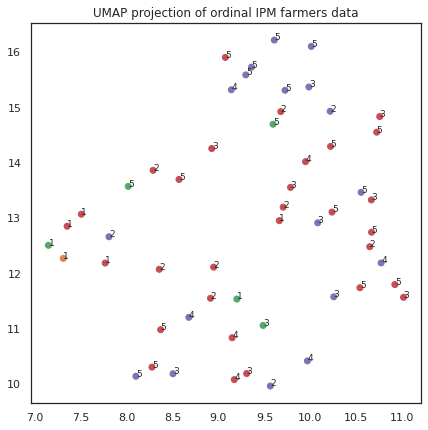

In [20]:
# Standardisation
scaled_array = StandardScaler().fit_transform(ordnum_df)
scaled_df = pd.DataFrame(scaled_array, columns=ordnum_df.columns)

# Mapping
reducer = umap.UMAP(n_neighbors=4, min_dist=0.1, n_components=2, metric="chebyshev", random_state=123)
ord_embedding = reducer.fit_transform(scaled_df)

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
fig, ax = plt.subplots(figsize=(7,7))
xs = ord_embedding[:, 0]
ys = ord_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in ordnum_df['DSS_can_improve_your_productivity_Cat']])

for i, val in enumerate(df_noNaN["Income_Cat"].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of ordinal IPM farmers data')

### Nominal features

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1762: UserWarning:

gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable



Text(0.5, 1.0, 'UMAP projection of nominal IPM farmers data')

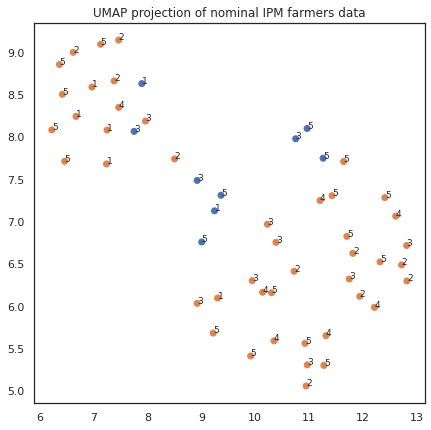

In [21]:
# scaled_array = StandardScaler().fit_transform(nom_df)
# scaled_df = pd.DataFrame(scaled_array, columns=nom_df.columns)

reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, metric="dice", random_state=123)
nom_embedding = reducer.fit_transform(nom_df)

fig, ax = plt.subplots(figsize=(7,7))
xs = nom_embedding[:, 0]
ys = nom_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in nom_df['Already_used_DSS']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of nominal IPM farmers data')

# naredi for loop da odstranjaš posamično atribute

### Combine nominal and ordinal/numeric feature maps

In [22]:
# combine mappings
intersection_embedding = nom_embedding * ord_embedding
union_embedding = nom_embedding + ord_embedding

Text(0.5, 1.0, 'UMAP projection of IPM farmers intersection data')

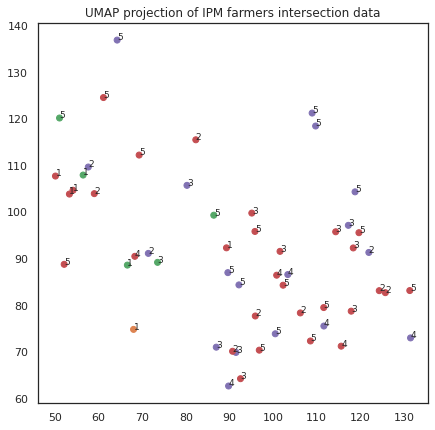

In [23]:
# plot intersection 2D embedding
fig, ax = plt.subplots(figsize=(7,7))
xs = intersection_embedding[:, 0]
ys = intersection_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['DSS_can_improve_your_productivity_Cat']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM farmers intersection data')

Text(0.5, 1.0, 'UMAP projection of IPM farmers union data')

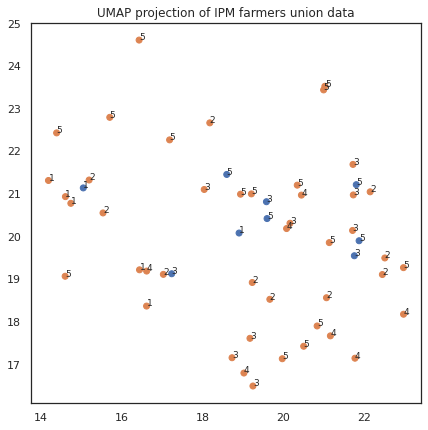

In [24]:
# plot union 2D embedding
fig, ax = plt.subplots(figsize=(7,7))
xs = union_embedding[:, 0]
ys = union_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['Already_used_DSS']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM farmers union data')

# CLUSTERING

Probaj clustering brez dim reduction

Text(0.5, 1.0, 'K-means clusters of UMAP projection of IPM farmers intersection data')

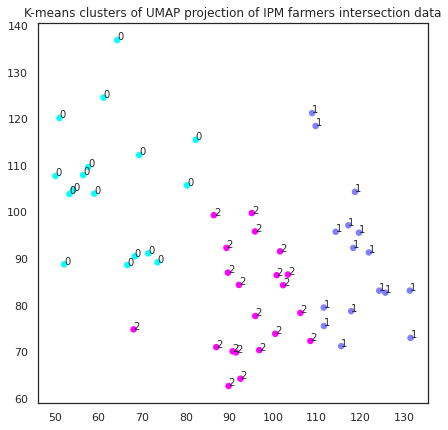

In [25]:
# k-means clustering 2D intersection emnbedding
km_inters_clusters = cluster.KMeans(n_clusters=3).fit_predict(intersection_embedding)

# plot
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(intersection_embedding[:, 0], intersection_embedding[:, 1], c=km_inters_clusters, s=30, cmap='cool')

# Add cluster text
for i, val in enumerate(km_inters_clusters.tolist()):
    ax.annotate(str(int(val)), (intersection_embedding[:, 0][i], intersection_embedding[:, 1][i]), fontsize=10)
plt.title('K-means clusters of UMAP projection of IPM farmers intersection data')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'HDBscan clusters of UMAP projection of IPM farmers intersection data')

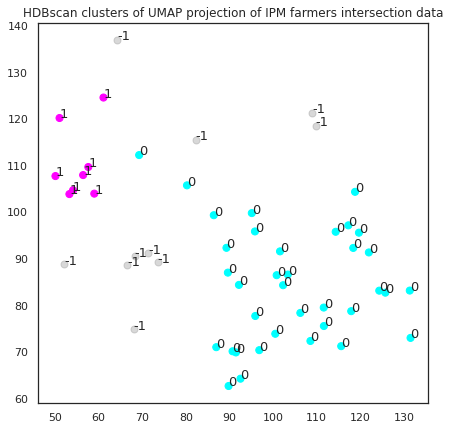

In [26]:
# hdbscan clustering 2D intersection emnbedding
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, min_samples=2)
hdbscan_inters_clusters = clusterer.fit_predict(intersection_embedding)

fig, ax = plt.subplots(figsize=(7,7))

clustered = (hdbscan_inters_clusters >= 0)
ax.scatter(intersection_embedding[~clustered, 0],
            intersection_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=50,
            alpha=0.3)

ax.scatter(intersection_embedding[clustered, 0],
            intersection_embedding[clustered, 1],
            c=hdbscan_inters_clusters[clustered],
            s=50,
            cmap='cool')

for i, val in enumerate(hdbscan_inters_clusters):
    ax.annotate(str(int(val)), (intersection_embedding[:, 0][i], intersection_embedding[:, 1][i]), fontsize=13)

plt.title('HDBscan clusters of UMAP projection of IPM farmers intersection data')

Text(0.5, 1.0, 'K-means clusters of UMAP projection of IPM farmers union data')

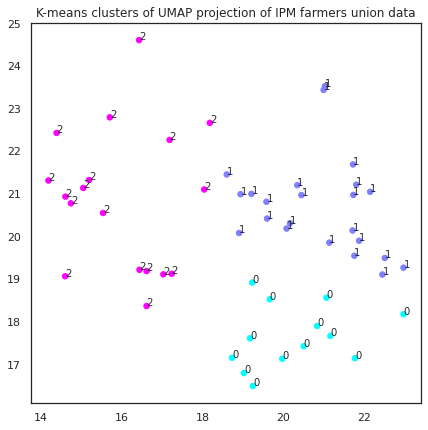

In [27]:
# kmeans clustering 2D union emnbedding
km_union_clusters = cluster.KMeans(n_clusters=3).fit_predict(union_embedding)
#kmeans_labels

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(union_embedding[:, 0], union_embedding[:, 1], c=km_union_clusters, s=30, cmap='cool')

# daj clustre (številke) gor v umap
for i, val in enumerate(km_union_clusters.tolist()):
    ax.annotate(str(int(val)), (union_embedding[:, 0][i], union_embedding[:, 1][i]), fontsize=10)

plt.title('K-means clusters of UMAP projection of IPM farmers union data')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'HDBscan clusters of UMAP projection of IPM farmers union data')

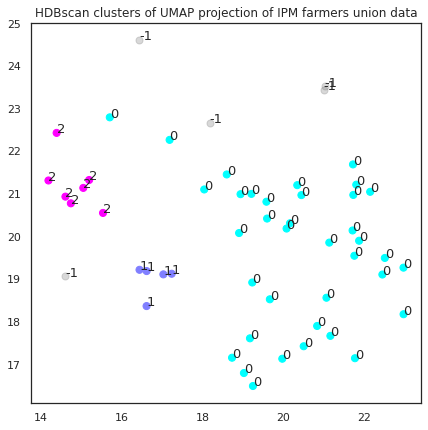

In [28]:
# hdbscan clustering 2D union emnbedding
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=4)
hdbscan_union_clusters = clusterer.fit_predict(union_embedding)

fig, ax = plt.subplots(figsize=(7,7))

clustered = (hdbscan_union_clusters >= 0)
ax.scatter(union_embedding[~clustered, 0],
            union_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=50,
            alpha=0.3)

ax.scatter(union_embedding[clustered, 0],
            union_embedding[clustered, 1],
            c=hdbscan_union_clusters[clustered],
            s=50,
            cmap='cool')

for i, val in enumerate(hdbscan_union_clusters):
    ax.annotate(str(int(val)), (union_embedding[:, 0][i], union_embedding[:, 1][i]), fontsize=13)

plt.title('HDBscan clusters of UMAP projection of IPM farmers union data')

Validate clusters
Which Metrics?

## Interactive 3D Visualisation

In [29]:
# 3D embedding
ord_reducer3d = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=3, metric="euclidean", random_state=123)
ord_embedding3d = ord_reducer3d.fit_transform(ordnum_df)
nom_reducer3d = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=3, metric="dice", random_state=123)
nom_embedding3d = nom_reducer3d.fit_transform(nom_df)

# combine mappings
intersection_embedding3d = nom_embedding3d * ord_embedding3d
union_embedding3d = nom_embedding3d + ord_embedding3d

# hdbscan
intersection_clusters = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=7).fit_predict(intersection_embedding3d)
union_clusters = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=7).fit_predict(union_embedding3d)
print("intersection_clusters :", intersection_clusters)
print("union_clusters :", union_clusters)

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1762: UserWarning:

gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable



intersection_clusters : [ 0  1  1  1  1  2 -1  2  0  2  2  0  1  2  2  0  1  2  2  0  1  2  0  1
  2  2 -1  2  0  2  0  2  2 -1  2  0  2  1  1  0 -1  0  2  0 -1  0  0  0
  0  2  1  2  2  2]
union_clusters : [ 2  0  0  0  0  1 -1  1  2  1  1 -1  0  1  1  2  0  1  1  2  0  1  2  0
  1  1 -1  1  2  1  2  1  1 -1  1  2  1  0  0  2 -1  2  1  2 -1  2  2  2
  2  1  0  1  1  1]


### Plotly visualisation

In [30]:
# 3D dataframes
intersection3d_df = pd.DataFrame(data=intersection_embedding3d, columns=["x", "y", "z"])
intersection3d_df["clusters"] = list(map(str, intersection_clusters))
union3d_df = pd.DataFrame(data=union_embedding3d, columns=["x", "y", "z"])
union3d_df["clusters"] = list(map(str, union_clusters))

In [31]:
# Intersection embedding cluster visualisation 
fig = px.scatter_3d(intersection3d_df, "x","y","z", color="clusters", text=df_noNaN["DSS_can_improve_your_productivity_Cat"], opacity=0.8, 
                    title="Intersection 3D embedding of farmers IPM data")
fig.show()

In [32]:
# Union embedding cluster visualisation 
fig = px.scatter_3d(union3d_df, "x","y","z", color="clusters", text=df_noNaN["DSS_can_improve_your_productivity_Cat"], opacity=0.5, 
                    title="Union 3D embedding of farmers IPM data")
fig.write_html("/content/plotly1.html")
fig.show()

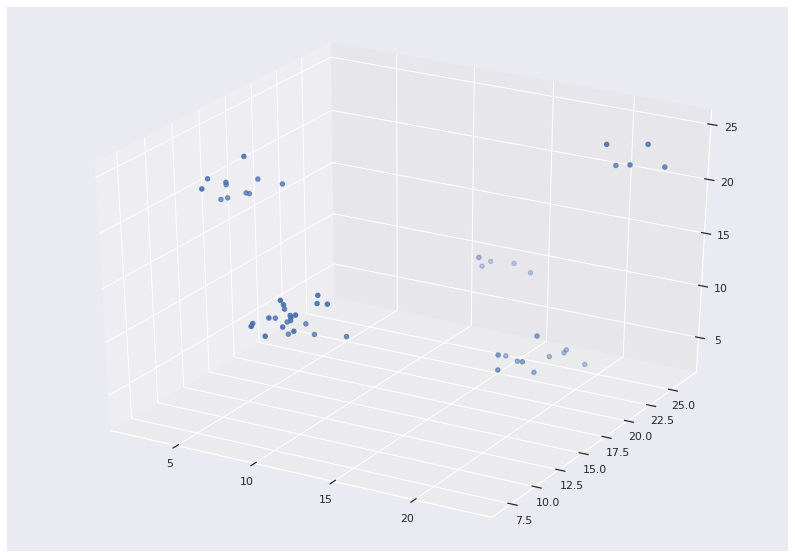

In [33]:
# 3D visualisation with seaborn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

xs = union_embedding3d[:, 0]
ys = union_embedding3d[:, 1] 
zs = union_embedding3d[:, 2]

ax.scatter(xs, ys, zs)

plt.show()

# Cluster explanation 

In [34]:
# DataFrame for classification with clusters from embedding3d
df_noNaN["clusters"] = intersection_clusters
df_clst = df_noNaN.copy()
df_clst

# use Weka and See5 (Quinlan) [moraš poklicat s !]
# https://colab.research.google.com/drive/1A9bZkPvXPAViipan7u9siQfkakChyYFV?usp=sharing#scrollTo=CgxRusBSCxrn

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,Prefered_type_Web_1,Prefered_type_Software_2,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to3,Importance_low_price_1to3,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to3,Appreciate_change_1to3,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat,Region_central_EU,Region_north_EU,Region_south_EU,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Italy,Country_Lithuania,Country_Netherlands,Country_Slovenia,Country_Sweden,Country_UK,clusters
4,2,1.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,1.0,1,10,1.0,3.0,1,2,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
5,1,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,0.0,1,5,1.0,2.0,1,3,1.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,2.0,3.0,2.0,0.0,1.0,0.0,1.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
6,1,1.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,0.0,1,5,1.0,1.0,1,2,1.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
9,3,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,3.0,100.0,3.0,1.0,1.0,1,0,1.0,3.0,1,3,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,2.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
11,4,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,100.0,3.0,2.0,1.0,1,0,1.0,2.0,1,3,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,3,1.0,3.0,5.0,1.0,0.0,1.0,0.0,0.0,3.0,90.0,1.0,1.0,1.0,1,25,1.0,3.0,1,3,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,1.0,2.0,3.0,2.0,0.0,1.0,0.0,2.0,2.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2
122,3,1.0,3.0,5.0,1.0,0.0,1.0,0.0,0.0,4.0,100.0,2.0,1.0,1.0,1,5,1.0,2.0,1,3,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,2.0,2.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
123,3,1.0,3.0,4.0,1.0,0.0,1.0,0.0,0.0,2.0,100.0,3.0,2.0,1.0,1,15,1.0,3.0,1,3,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,4.0,0.0,0.0,1.0,3.0,1.0,3.0,3.0,2.0,0.0,1.0,0.0,2.0,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2
124,5,1.0,3.0,5.0,1.0,0.0,1.0,0.0,0.0,3.0,100.0,3.0,1.0,1.0,1,10,1.0,2.0,1,3,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3

In [35]:
# export csv
df_clst.to_csv("IPM_farmers_clusters.csv") 

## Modelling

[Text(260.40000000000003, 475.65000000000003, 'Proportion_of_income <= 55.0\ngini = 0.696\nsamples = 54\nvalue = [5, 16, 11, 22]\nclass = 3'),
 Text(130.20000000000002, 339.75, 'gini = 0.0\nsamples = 16\nvalue = [0, 16, 0, 0]\nclass = 1'),
 Text(390.6, 339.75, 'Years_own_phone <= 7.0\ngini = 0.564\nsamples = 38\nvalue = [5, 0, 11, 22]\nclass = 3'),
 Text(260.40000000000003, 203.85000000000002, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0]\nclass = 2'),
 Text(520.8000000000001, 203.85000000000002, 'Proportion_of_income <= 80.0\ngini = 0.302\nsamples = 27\nvalue = [5, 0, 0, 22]\nclass = 3'),
 Text(390.6, 67.94999999999999, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0, 0]\nclass = 0'),
 Text(651.0000000000001, 67.94999999999999, 'gini = 0.0\nsamples = 22\nvalue = [0, 0, 0, 22]\nclass = 3')]

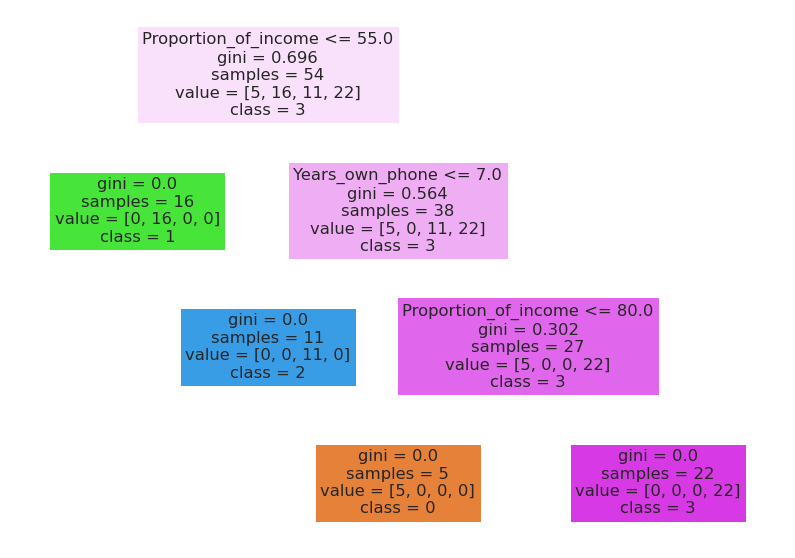

In [36]:
from sklearn import tree

target_class = "clusters"
X, y = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]], df_noNaN[target_class]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf, feature_names=X.columns, class_names=[str(_) for _ in [0,1,2,3]], filled=True) 

In [37]:
# Train the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target_class = "clusters"
X = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]]
y = df_noNaN[target_class]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# Predictions for test dataset
y_predict = model.predict(X_test)
y_predict

array([ 0,  2,  0,  1, -1,  2,  2,  2,  1,  2,  2,  0, -1, -1,  2,  1,  1,
        2])

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(random_state=0)

target_class = "Already_used_DSS"
X = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]]
Y = df_noNaN[target_class]
clf = clf.fit(X, Y)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X, Y)
r = export_text(decision_tree, feature_names=list(X.columns))
print(r)

|--- How_do_you_access_DSS_Cat <= 1.50
|   |--- class: 0.0
|--- How_do_you_access_DSS_Cat >  1.50
|   |--- class: 1.0



In [41]:
# """Ne morem importat, nek conflict
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("IPM") 
# """

# create dictionary with value mapping

In [42]:
# df["test"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})
# df["Age_Cat"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})